In [ ]:

import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
dataset, metadata = tfds.load('EMNIST/byclass', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [ ]:
class_names = ['0', '1', '2', '3', '4',
        '5', '6', '7', '8', '9','10', '11', '12', '13', '14','15', '16', '17', '18', '19','20', '21', '22', '23', '24','25', '26', '27', '28', '29'
        ,'30', '31', '32', '33', '34','35', '36', '37', '38', '39','40', '41', '42', '43', '44','45', '46', '47', '48', '49','50','51', '52', '53', '54','55', '56', '57', '58', '59','60','61']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 697932
Number of test examples: 116323


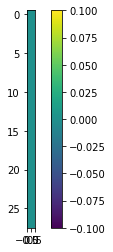

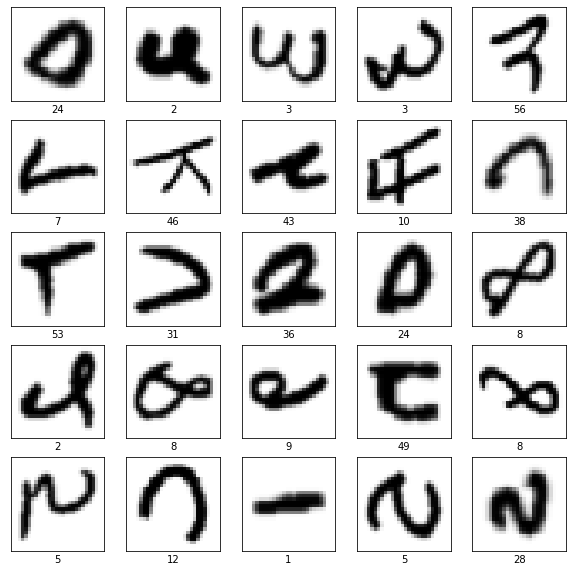

In [ ]:
#正規化將pixel從[0~255]變成[0~1]之間的範圍
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels
# map函數將normalize函式映射到train_dataset和test_dataset
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)
# 將圖片快取至記憶體當中，加快後續載入速度
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()
# 將圖片移除顏色
for image, label in test_dataset.take(1):
    break
    image = image.numpy().reshape((28,28))
# 單一圖片
plt.figure()
plt.imshow(image[0])
plt.colorbar()
plt.grid(False)
plt.show()
# 顯示前25張圖片
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28,1)),  #輸入層
    tf.keras.layers.Dense(128, activation=tf.nn.relu), #隱藏層
    tf.keras.layers.Dense(62)                          #輸出層
])
#(input_shape=(28, 28, 1))，將圖片尺寸從28x28轉到1維陣列(784 pixels)
#(128, activation=tf.nn.relu)，128個神經元、激活函數使用RELU
#(62)，代表著輸出有62個類別
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
# optimizer：使用adam來降低損失
# loss：測量損失
# metrics：使用accuracy來衡量

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
21811/21811 [==============================] - 111s 2ms/step - loss: 0.8842 - accuracy: 0.7411
Epoch 2/5
21811/21811 [==============================] - 56s 3ms/step - loss: 0.5382 - accuracy: 0.8202
Epoch 3/5
21811/21811 [==============================] - 52s 2ms/step - loss: 0.5045 - accuracy: 0.8285
Epoch 4/5
21811/21811 [==============================] - 51s 2ms/step - loss: 0.4939 - accuracy: 0.8318
Epoch 5/5
21811/21811 [==============================] - 49s 2ms/step - loss: 0.4864 - accuracy: 0.8331


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

3636/3636 [==============================] - 18s 5ms/step - loss: 0.5111 - accuracy: 0.8301
Accuracy on test dataset: 0.8300508260726929


In [ ]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
predictions[0]              #預測第一張圖片，顯示10個類別的信心分數
np.argmax(predictions[0])   #用numpy找出信心分數最高的類別
print(test_labels[0])   #用test集判斷是否與預測結果一樣



24
